# **[OK]**

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Sequential

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

In [11]:
data.groupby('gender')['nama'].count()

gender
0    322536
1    301702
Name: nama, dtype: int64

In [15]:
names = data['nama']
gender = data['gender']
vocab = set(' '.join([str(i) for i in names]))
vocab.add('END')
len_vocab = len(vocab)

print(vocab)
print("vocab length is ",len_vocab)
print ("length of input is ",len(data))

{'g', 'b', 't', 'c', '0', 'l', 'e', 'z', 'q', 'w', 'm', 'y', ';', 'n', 'a', 'h', 'x', 'f', 'u', 'j', '"', ',', 'END', 'v', 'r', 'k', ' ', '-', 'd', 'p', 's', '.', 'i', "'", 'o'}
vocab length is  35
length of input is  624238


In [16]:
char_index = dict((c, i) for i, c in enumerate(vocab))
print(char_index)

{'g': 0, 'b': 1, 't': 2, 'c': 3, '0': 4, 'l': 5, 'e': 6, 'z': 7, 'q': 8, 'w': 9, 'm': 10, 'y': 11, ';': 12, 'n': 13, 'a': 14, 'h': 15, 'x': 16, 'f': 17, 'u': 18, 'j': 19, '"': 20, ',': 21, 'END': 22, 'v': 23, 'r': 24, 'k': 25, ' ': 26, '-': 27, 'd': 28, 'p': 29, 's': 30, '.': 31, 'i': 32, "'": 33, 'o': 34}


In [19]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [22]:
model = Sequential()
model.add(Embedding(input_dim=27, output_dim=64, input_length=29))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
hist = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=20, batch_size=128)

Epoch 1/20
4877/4877 [==============================] - 183s 37ms/step - loss: 0.1411 - accuracy: 0.9445 - val_loss: 0.1247 - val_accuracy: 0.9508
Epoch 2/20
4877/4877 [==============================] - 209s 43ms/step - loss: 0.1222 - accuracy: 0.9523 - val_loss: 0.1114 - val_accuracy: 0.9566
Epoch 3/20
4877/4877 [==============================] - 211s 43ms/step - loss: 0.1127 - accuracy: 0.9566 - val_loss: 0.1040 - val_accuracy: 0.9596
Epoch 4/20
4877/4877 [==============================] - 217s 45ms/step - loss: 0.1068 - accuracy: 0.9590 - val_loss: 0.0986 - val_accuracy: 0.9620
Epoch 5/20
4877/4877 [==============================] - 207s 43ms/step - loss: 0.1027 - accuracy: 0.9606 - val_loss: 0.0976 - val_accuracy: 0.9629
Epoch 6/20
4877/4877 [==============================] - 209s 43ms/step - loss: 0.0995 - accuracy: 0.9619 - val_loss: 0.0932 - val_accuracy: 0.9643
Epoch 7/20
4877/4877 [==============================] - 209s 43ms/step - loss: 0.0968 - accuracy: 0.9629 - val_loss: 0

In [26]:
model.save('../../models/gender-bi-lstm-base.h5')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 29, 64)            1728      
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 84,417
Trainable params: 84,417
Non-trainable params: 0
__________________________________________________

In [28]:
score = model.evaluate(x_train, y_train, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9754/9754 [==============================] - 133s 14ms/step - loss: 0.0701 - accuracy: 0.9731

ACCURACY: 0.9731224775314331
LOSS: 0.07011298090219498


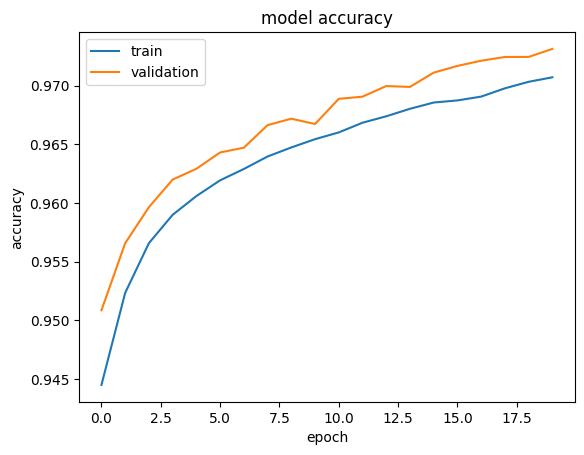

In [29]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

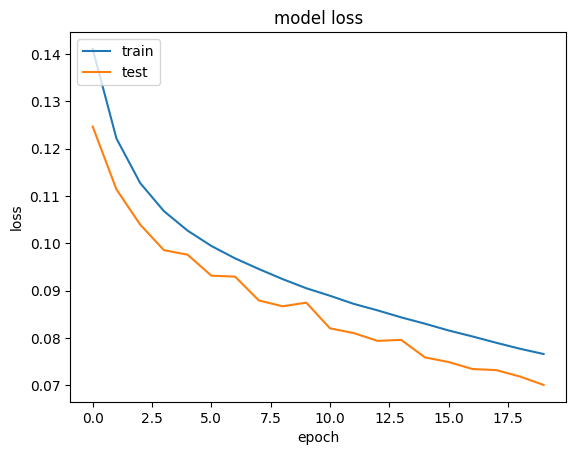

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 172s 9ms/step
Accuracy: 97.31%


In [32]:
print(classification_report(y_train, labels_pred, digits=5))

              precision    recall  f1-score   support

           0    0.97292   0.97512   0.97402    322536
           1    0.97334   0.97098   0.97216    301702

    accuracy                        0.97312    624238
   macro avg    0.97313   0.97305   0.97309    624238
weighted avg    0.97312   0.97312   0.97312    624238



In [1]:
import tensorflow as tf
import numpy as np
    
model = tf.keras.models.load_model('../../models/gender-bi-lstm-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector, verbose=0)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
    'Novi', 
    'Novia Kumala Sari', 
    'Novianto Rahmadi', 
    'Melani', 
    'Malik', 
    'Melani Malik', 
    'Annisa Rahmadi', 
    'Annisa Rahma Adi', 
    'Annisa', 
    'Rahmadi', 
    'Putra Saputri', 
    'Putri Saputra', 
    'Nur Putra', 
    'Nur Putri', 
    'Dwi Syafutra', 
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-28 10:12:29.419389: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Novi = Female
Novia Kumala Sari = Female
Novianto Rahmadi = Male
Melani = Female
Malik = Male
Melani Malik = Female
Annisa Rahmadi = Female
Annisa Rahma Adi = Female
Annisa = Female
Rahmadi = Male
Putra Saputri = Female
Putri Saputra = Female
Nur Putra = Male
Nur Putri = Female
Dwi Syafutra = Male


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-26 04:14:07.669158: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19508/19508 [==============================] - 168s 9ms/step


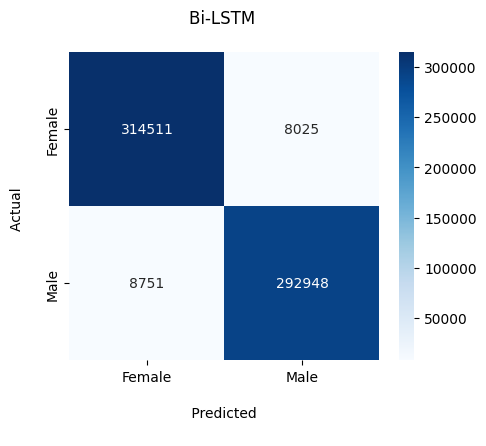

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

model = tf.keras.models.load_model('../../models/gender-bi-lstm-base.h5')
labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
cm = confusion_matrix(y_train, labels_pred)

plt.figure(figsize=(5,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
fx.set_title('Bi-LSTM \n');
fx.set_xlabel('\n Predicted \n')
fx.set_ylabel('Actual \n');
fx.xaxis.set_ticklabels(['Female','Male'])
fx.yaxis.set_ticklabels(['Female','Male'])
plt.show()